In [18]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import math
%matplotlib inline

In [19]:
outdir="wos_processed_data"

wos = pd.read_excel(f"{outdir}/wos_processed.xlsx")

wos_addresses = pd.read_excel(f"{outdir}/wos_addresses.xlsx")

wos_affiliations = pd.read_excel(f"{outdir}/wos_affiliations.xlsx")
wos_affiliations = wos_affiliations[wos_affiliations["Affiliations"]!="UNKNOWN"].copy()

wos_author_locations = pd.read_excel(f"{outdir}/wos_author_locations.xlsx")

wos_univ_locations = pd.read_excel(f"{outdir}/wos_univ_locations.xlsx")

In [20]:
record_col = "UT (Unique WOS ID)"

# Output - per yer, by Metrix taxonomy

## Domains

In [21]:
group = 'Domain_English'
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=record_col)
data

Domain_English  UT (Unique WOS ID)
0            Applied Sciences                5379
5            Natural Sciences                1649
3             Health Sciences                1106
2  Economic & Social Sciences                 289
4               Miscellaneous                 156
1           Arts & Humanities                  13

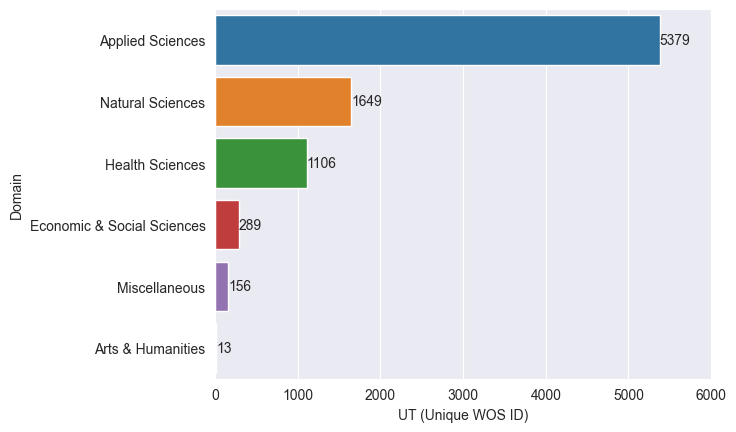

In [22]:
g = sns.barplot(data, x=record_col, y=group)
g.set_xlim(0,6000)
g.set_ylabel("Domain")
for i in g.containers:
    g.bar_label(i,)

In [23]:
group = ['Publication Year','Domain_English']
data = wos.groupby(group)[record_col].nunique().unstack(fill_value=0).stack().reset_index().rename(columns={0:record_col}).sort_values(ascending=False, by=group+[record_col])
data

Publication Year              Domain_English  UT (Unique WOS ID)
65              2022            Natural Sciences                 524
64              2022               Miscellaneous                  41
63              2022             Health Sciences                 368
62              2022  Economic & Social Sciences                 106
61              2022           Arts & Humanities                   4
..               ...                         ...                 ...
4               2012               Miscellaneous                   3
3               2012             Health Sciences                   2
2               2012  Economic & Social Sciences                   0
1               2012           Arts & Humanities                   0
0               2012            Applied Sciences                  21

[66 rows x 3 columns]

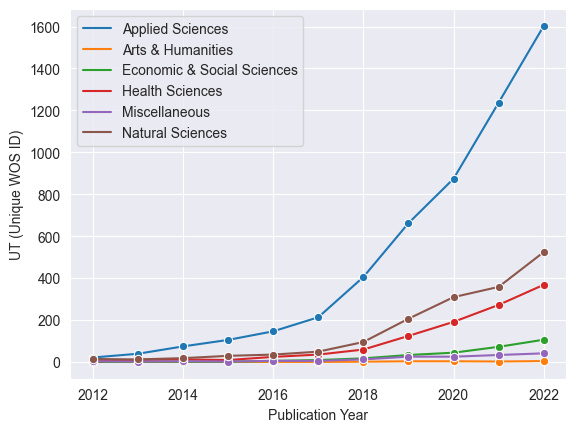

In [24]:
g=sns.lineplot(data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0], hue=group[-1], marker="o")
g.set(xticks=list(range(2012,2022+1,2)))
g.legend(title=None)

## Field

In [25]:
group = ['Publication Year',"Domain_English",'Field_English']
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
176              2022  Natural Sciences  \
175              2022  Natural Sciences   
174              2022  Natural Sciences   
173              2022  Natural Sciences   
172              2022  Natural Sciences   
..                ...               ...   
4                2012     Miscellaneous   
3                2012   Health Sciences   
2                2012  Applied Sciences   
1                2012  Applied Sciences   
0                2012  Applied Sciences   

                                Field_English  UT (Unique WOS ID)  
176                       Physics & Astronomy                 205  
175                  Mathematics & Statistics                  61  
174            Earth & Environmental Sciences                 134  
173                                 Chemistry                  81  
172                                   Biology                  43  
..                                        ...                 ...  
4                               Miscellaneous                   3  
3                           Clinical Medicine                   2  
2    Information & Communication Technologies                  14  
1                                 Engineering                   5  
0           Agriculture, Fisheries & Forestry                   2  

[177 rows x 4 columns]

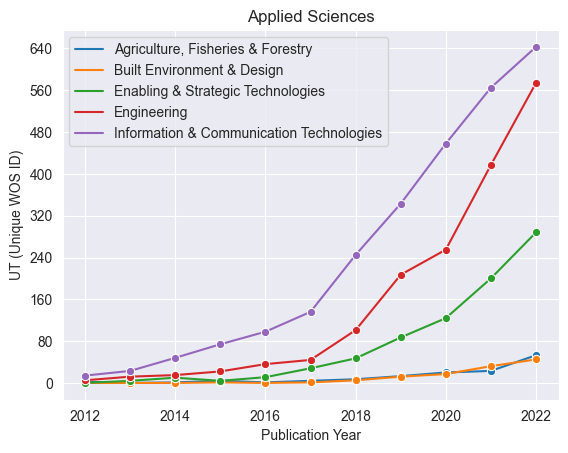

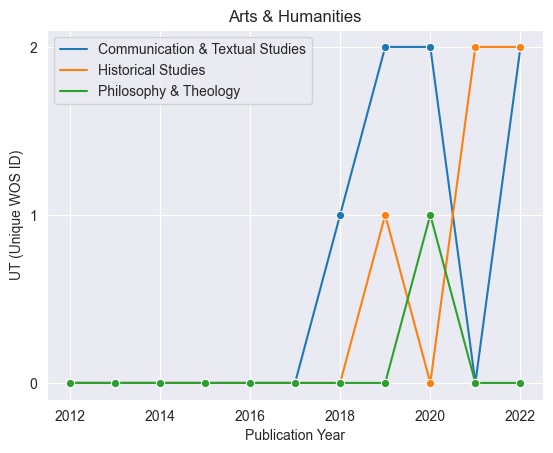

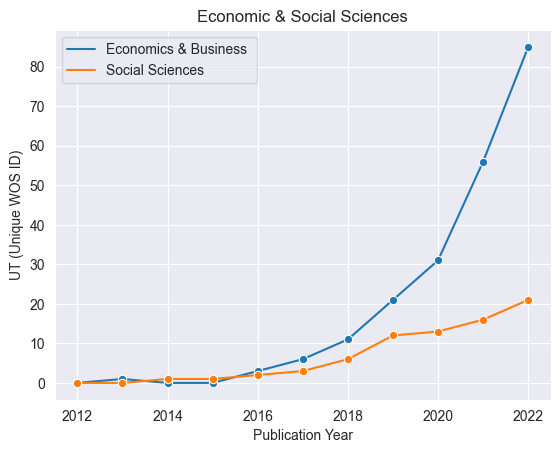

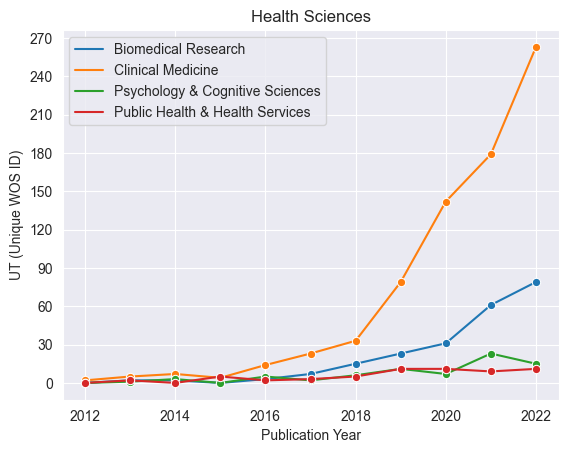

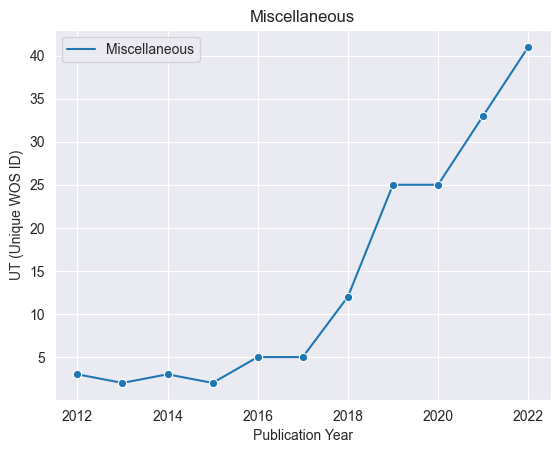

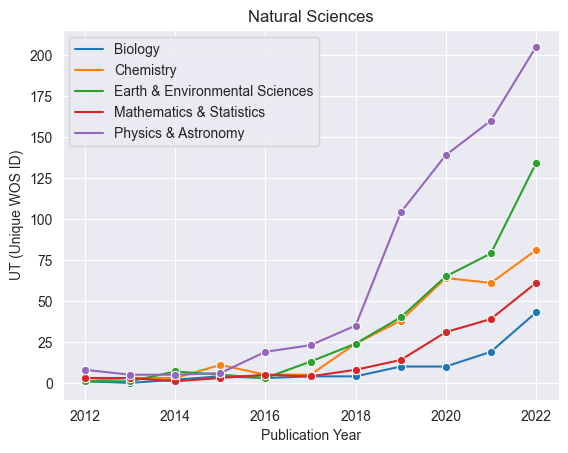

In [26]:
for cat in sorted(data[group[-2]].unique()):
    #data segment
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    #plot
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),
                   y=record_col,x=group[0], hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None)
    g.set_title(cat)
    g.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

## SubField

In [27]:
group = ['Publication Year',"Domain_English",'Field_English',"SubField_English"]
data = wos.groupby(group, as_index=False)[record_col].nunique().sort_values(ascending=False, by=group+[record_col])
data

Publication Year    Domain_English   
774              2022  Natural Sciences  \
773              2022  Natural Sciences   
772              2022  Natural Sciences   
771              2022  Natural Sciences   
770              2022  Natural Sciences   
..                ...               ...   
4                2012  Applied Sciences   
3                2012  Applied Sciences   
2                2012  Applied Sciences   
1                2012  Applied Sciences   
0                2012  Applied Sciences   

                                Field_English   
774                       Physics & Astronomy  \
773                       Physics & Astronomy   
772                       Physics & Astronomy   
771                       Physics & Astronomy   
770                       Physics & Astronomy   
..                                        ...   
4    Information & Communication Technologies   
3                                 Engineering   
2                                 Engineering   
1                                 Engineering   
0           Agriculture, Fisheries & Forestry   

                               SubField_English  UT (Unique WOS ID)  
774                                      Optics                  56  
773                  Nuclear & Particle Physics                  28  
772                        Mathematical Physics                   2  
771                             General Physics                  14  
770                            Fluids & Plasmas                  21  
..                                          ...                 ...  
4    Artificial Intelligence & Image Processing                  10  
3           Mechanical Engineering & Transports                   1  
2           Industrial Engineering & Automation                   3  
1            Geological & Geomatics Engineering                   1  
0                                  Food Science                   2  

[775 rows x 5 columns]

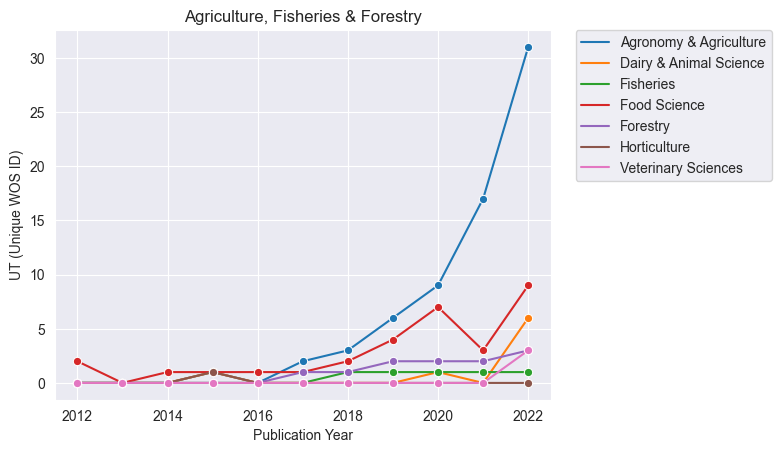

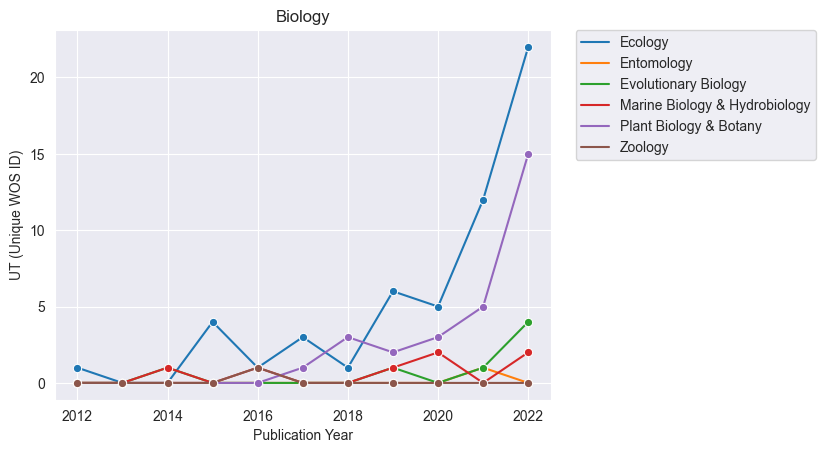

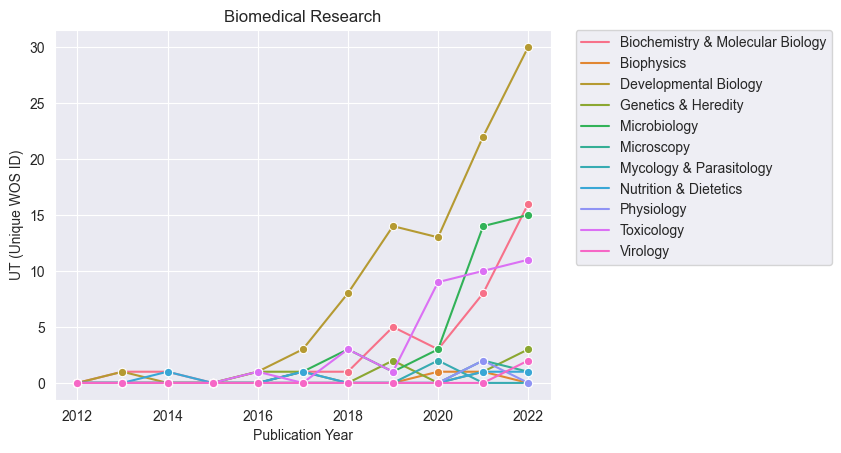

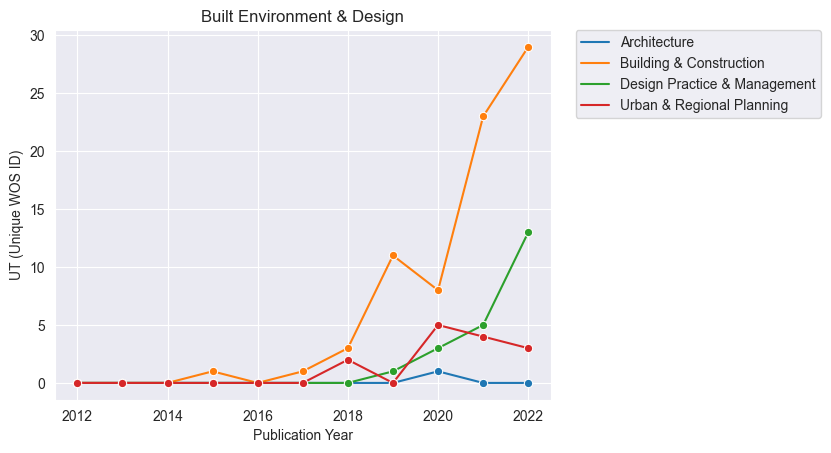

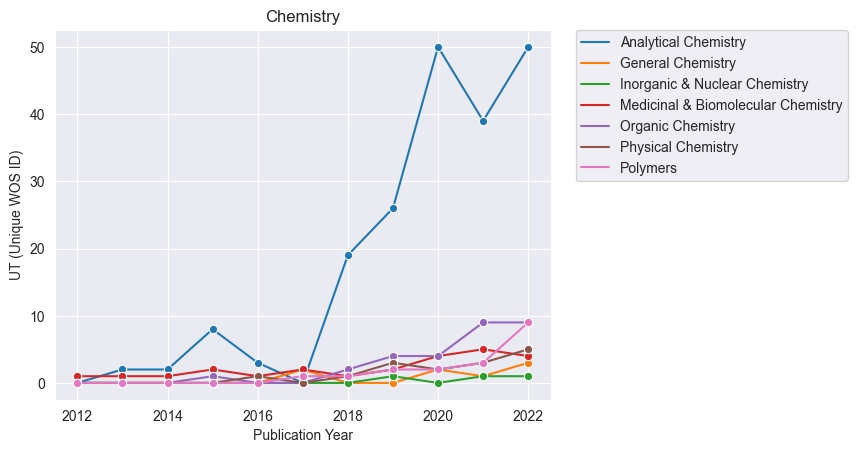

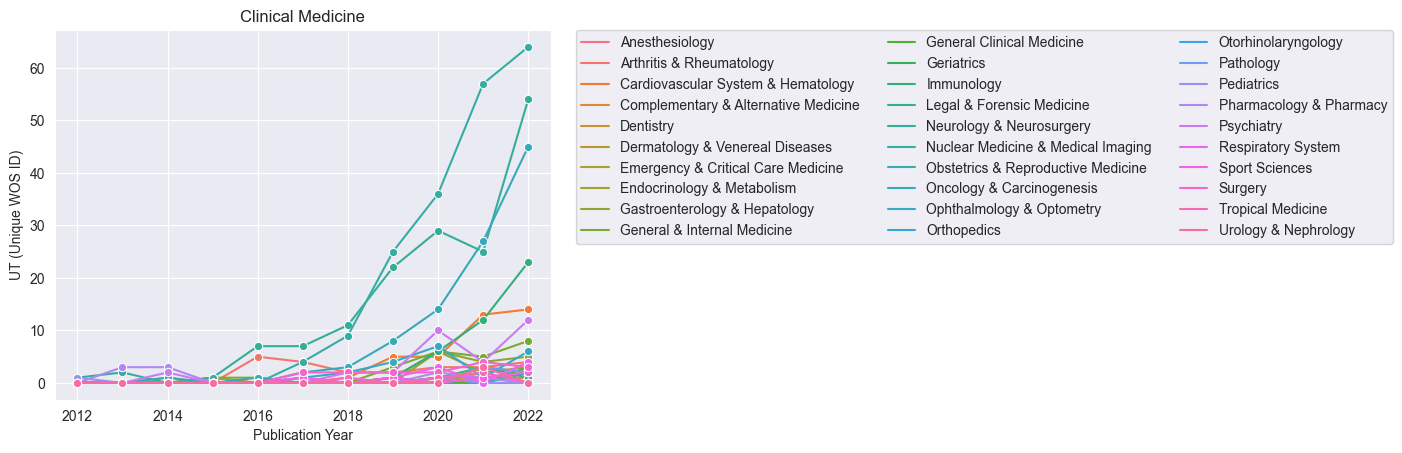

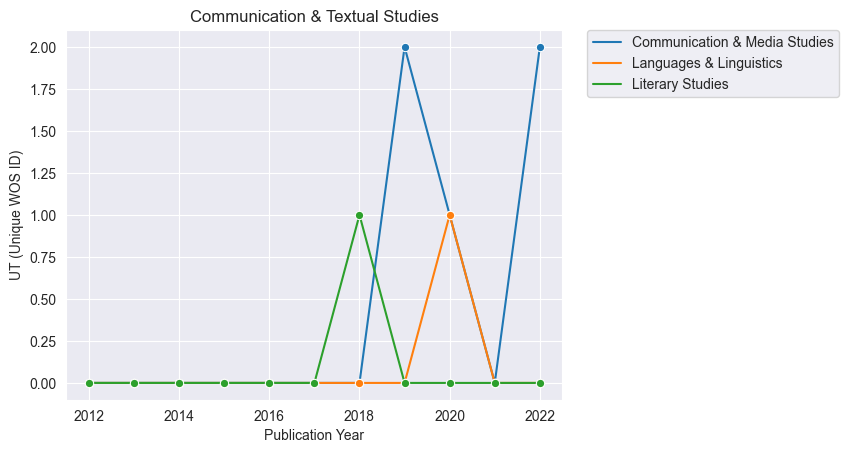

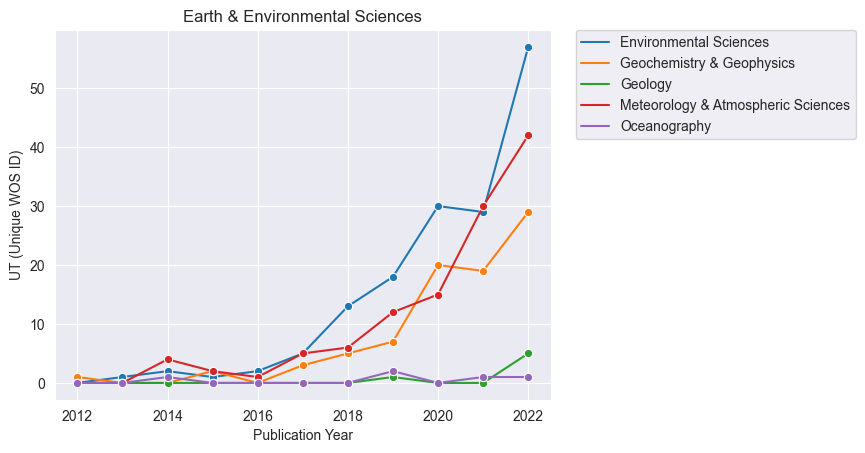

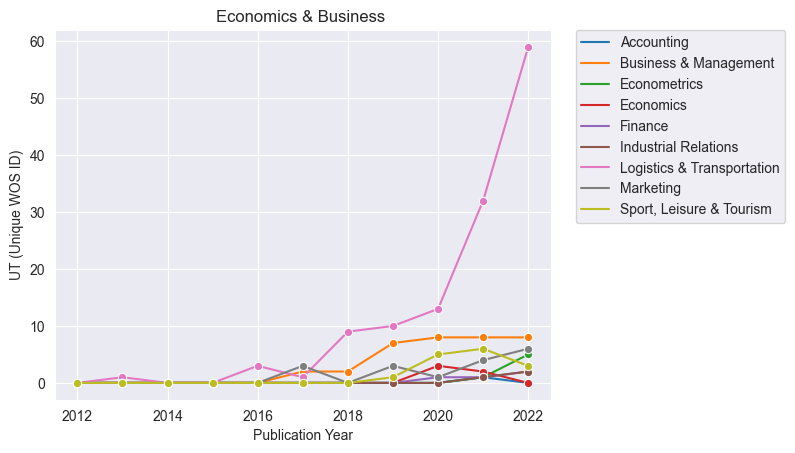

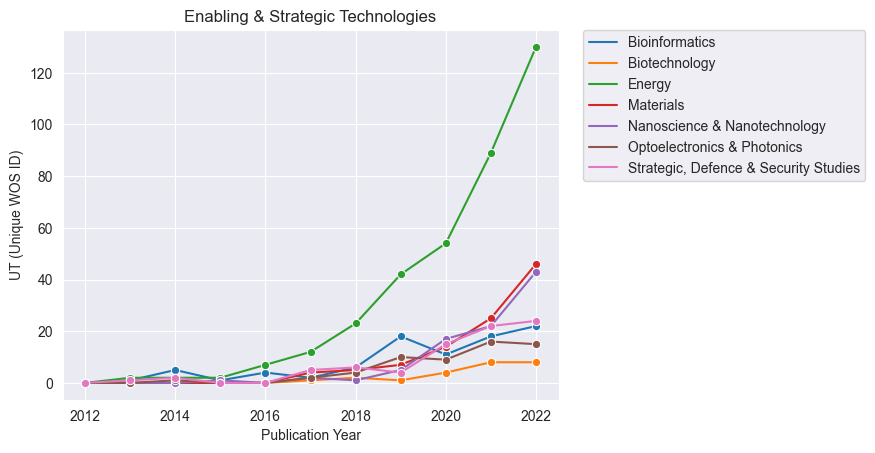

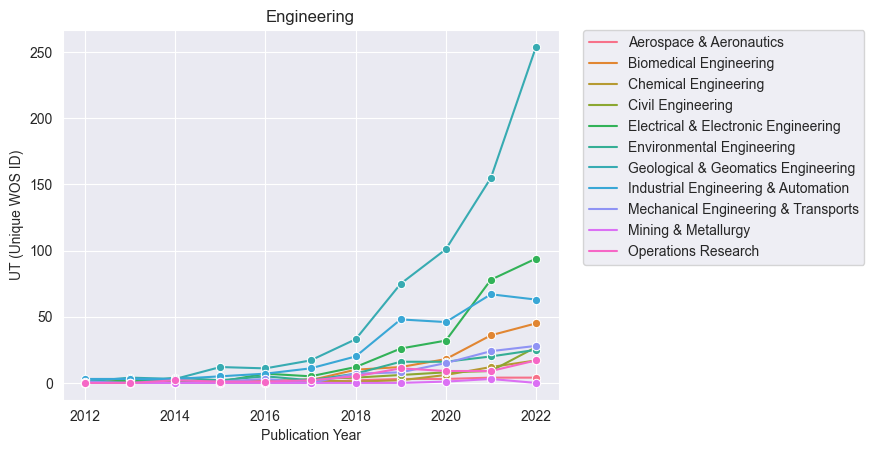

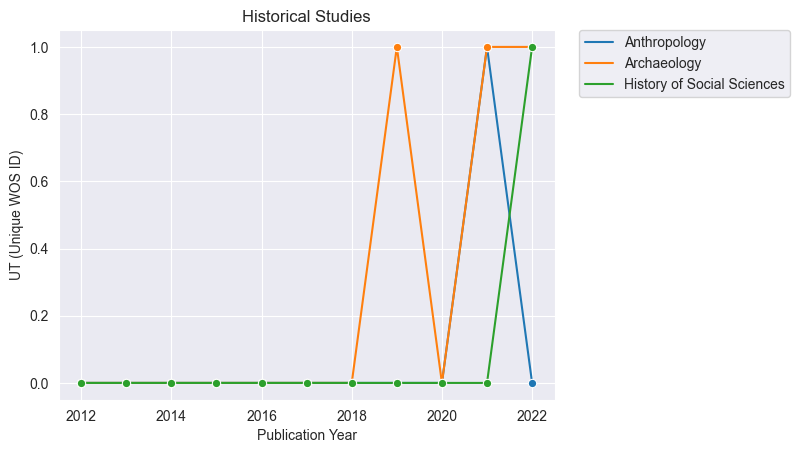

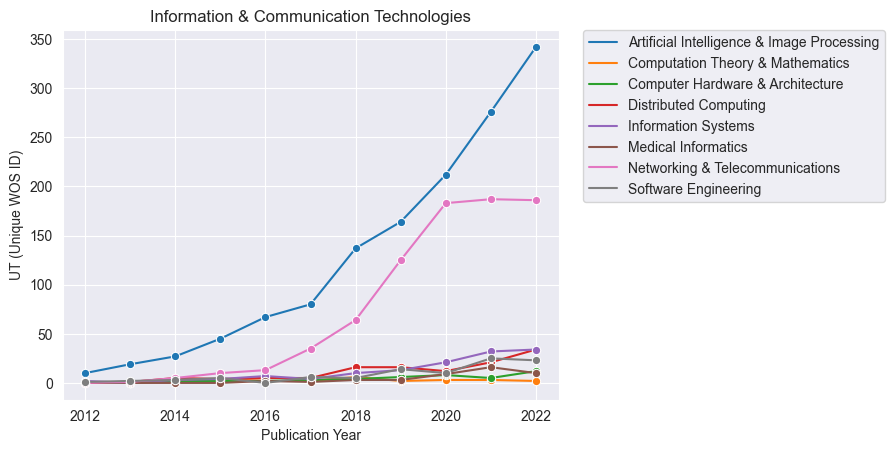

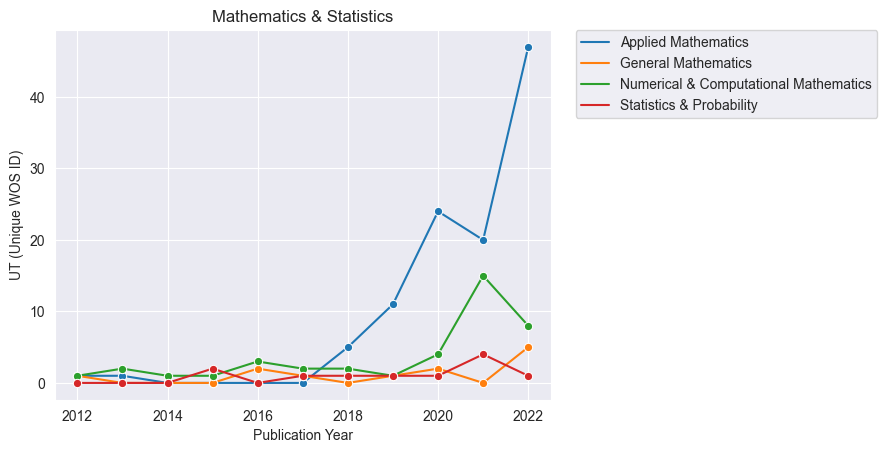

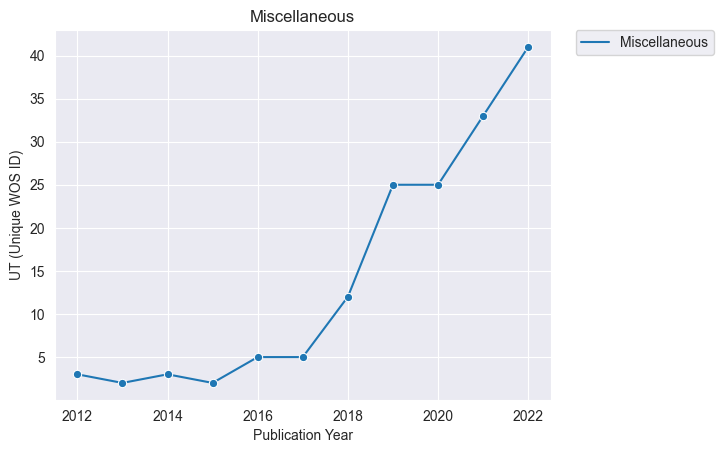

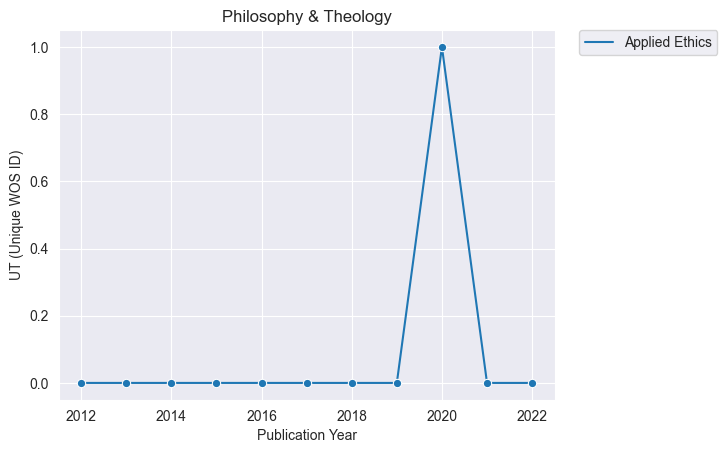

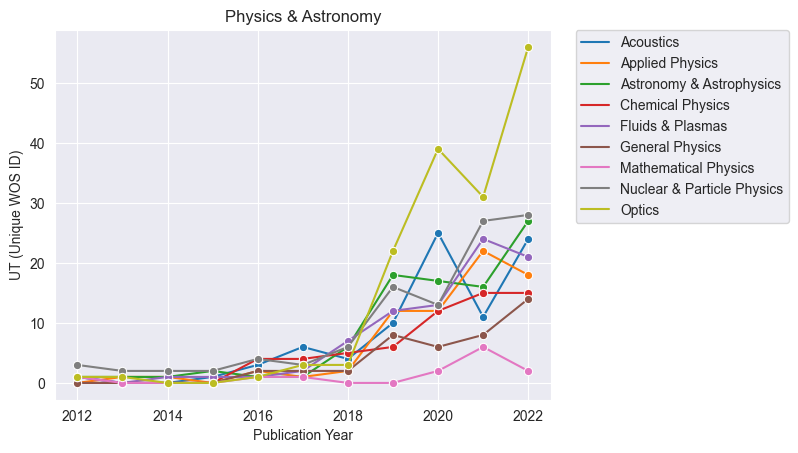

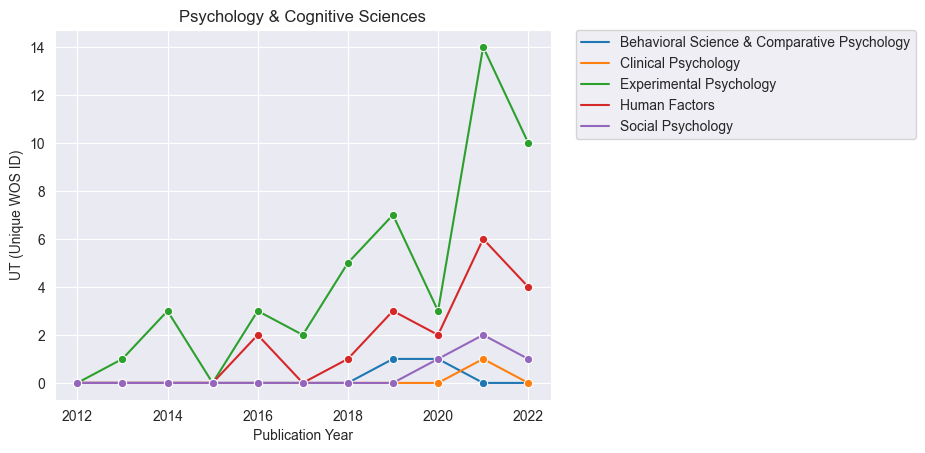

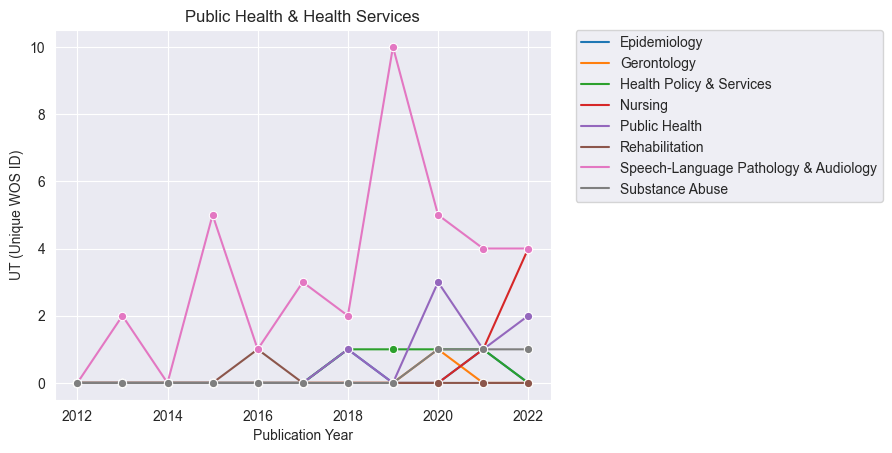

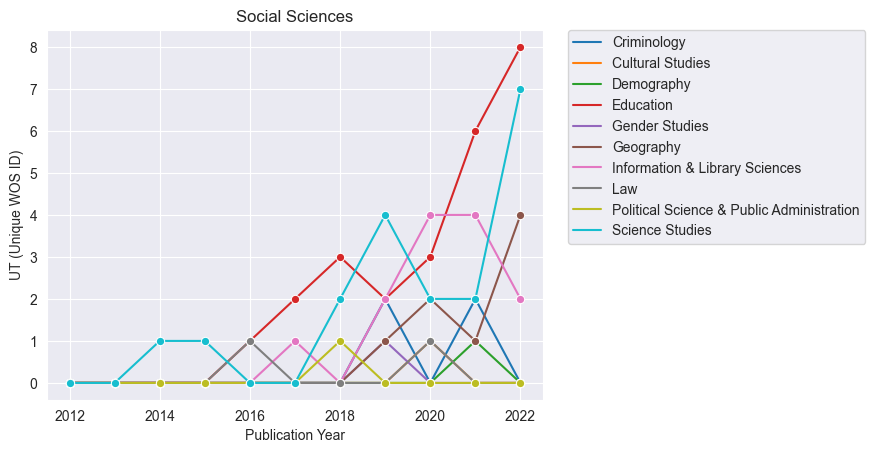

In [28]:
for cat in sorted(data[group[-2]].unique()):
    sub_data = data[data[group[-2]]==cat]
    sub_data = sub_data.complete({group[0]:range(int(data[group[0]].min()), int(data[group[0]].max()) + 1)}
                                 ,group[-1],fill_value=0)
    g=sns.lineplot(sub_data.sort_values(ascending=True, by=group[-1]),y=record_col,x=group[0],
                   hue=group[-1], marker="o")
    g.set(xticks=list(range(2012,2022+1,2)))
    g.legend(title=None,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncols=math.ceil(len(g.legend_.texts)/12))
    g.set_title(cat)
    plt.show()

## Collabs

### Country

In [29]:
wos_collabs = wos_addresses[wos_addresses["Country_Type"]!="Other"][[record_col,"Country"]].drop_duplicates()

In [30]:
country_collab = wos_collabs[wos_collabs["Country"]!="China"]["Country"].value_counts().reset_index()
country_collab["percent"] = country_collab["count"]/wos_collabs[record_col].nunique()
country_collab["weight"] = country_collab["count"]/wos_collabs[record_col].size
country_collab

Country  count   percent    weight
0          Germany   2309  0.233492  0.101095
1           France   1632  0.165032  0.071454
2            Italy   1260  0.127414  0.055166
3      Netherlands   1063  0.107493  0.046541
4            Spain    987  0.099808  0.043214
5           Sweden    832  0.084134  0.036427
6          Finland    700  0.070786  0.030648
7          Denmark    566  0.057235  0.024781
8          Ireland    552  0.055820  0.024168
9          Belgium    499  0.050460  0.021848
10          Poland    486  0.049146  0.021278
11         Austria    373  0.037719  0.016331
12        Portugal    365  0.036910  0.015981
13          Greece    320  0.032359  0.014011
14         Hungary    181  0.018303  0.007925
15  Czech Republic    144  0.014562  0.006305
16         Romania    133  0.013449  0.005823
17        Slovenia    111  0.011225  0.004860
18        Slovakia     75  0.007584  0.003284
19       Lithuania     68  0.006876  0.002977
20         Estonia     65  0.006573  0.002846
21      Luxembourg     59  0.005966  0.002583
22         Croatia     56  0.005663  0.002452
23        Bulgaria     48  0.004854  0.002102
24          Cyprus     35  0.003539  0.001532
25          Latvia     20  0.002022  0.000876
26           Malta     13  0.001315  0.000569

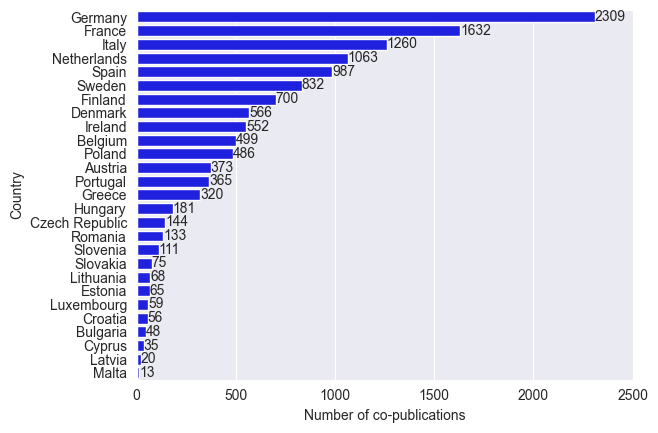

In [31]:
data = country_collab
g = sns.barplot(data, x="count", y="Country", color="blue")
g.set_xlim(0,2500)
g.set_ylabel("Country")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)

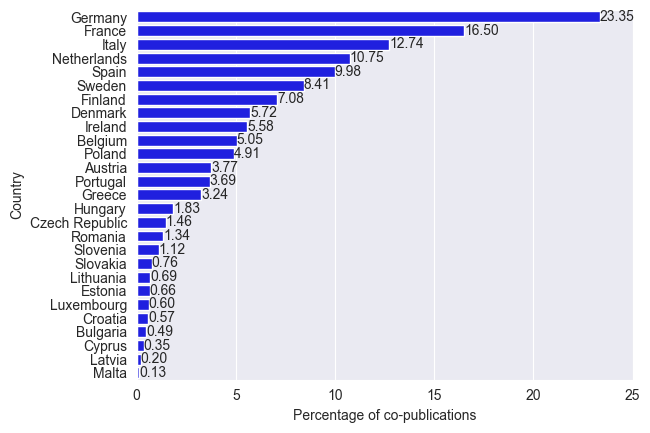

In [32]:
data = country_collab
data["percent_round"] = (data["percent"]*100).round(2)
g = sns.barplot(data, x="percent_round", y="Country", color="blue")
g.set_xlim(0,25)
g.set_ylabel("Country")
g.set_xlabel("Percentage of co-publications")
for i in g.containers:
    # g.bar_label(i,fmt='%.2f%%')
    g.bar_label(i,fmt='%.2f')

### Institution

In [33]:
wos_affiliations[["Affiliations","Affiliations_merged","Institution"]].nunique()

Affiliations           4883
Affiliations_merged    4240
Institution            6357
dtype: int64

In [34]:
aff = "Affiliations"

In [44]:
wos_inst_collabs = wos_affiliations[wos_affiliations["Country_Type"]!="Other"][[record_col,aff,"Country"]].drop_duplicates()

In [39]:
wos_inst_collabs[aff].nunique()

2771

In [49]:
# Institutions in China
inst_collab = wos_inst_collabs[wos_inst_collabs["Country"]=="China"][aff].value_counts().reset_index()
inst_collab["percent"] = inst_collab["count"]/wos_inst_collabs[record_col].nunique()
inst_collab["weight"] = inst_collab["count"]/wos_inst_collabs[record_col].size
inst_collab

Affiliations  count   percent   
0                           CHINESE ACADEMY OF SCIENCES   1128  0.114704  \
1        UNIVERSITY OF CHINESE ACADEMY OF SCIENCES, CAS    400  0.040675   
2                                   TSINGHUA UNIVERSITY    393  0.039963   
3                         SHANGHAI JIAO TONG UNIVERSITY    354  0.035998   
4                                   ZHEJIANG UNIVERSITY    337  0.034269   
...                                                 ...    ...       ...   
1388                                  JI HUA LABORATORY      1  0.000102   
1389                      UNIVERSITY SYSTEM OF MARYLAND      1  0.000102   
1390             LUNENFELD TANENBAUM RESEARCH INSTITUTE      1  0.000102   
1391  WUHAN RESEARCH INSTITUTE OF POST & TELECOMMUNI...      1  0.000102   
1392  INSTITUTE OF QUALITY STANDARDS & TESTING TECHN...      1  0.000102   

        weight  
0     0.028062  
1     0.009951  
2     0.009777  
3     0.008807  
4     0.008384  
...        ...  
1388  0.000025  
1389  0.000025  
1390  0.000025  
1391  0.000025  
1392  0.000025  

[1393 rows x 4 columns]

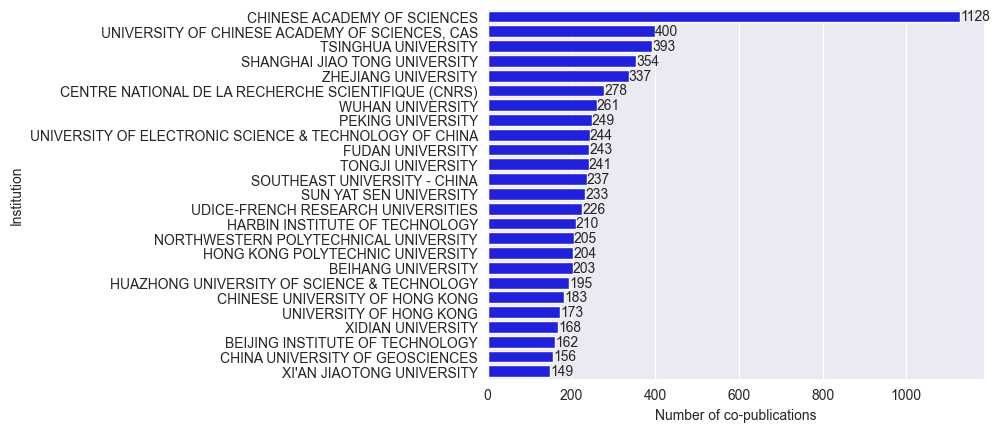

In [50]:
data = inst_collab[0:25]
g = sns.barplot(data, x="count", y=aff, color="blue")
g.set_ylabel("Institution")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)

* observe: CNRS --> Institution - country merge needs some more work

In [51]:
# Institutions in EU
inst_collab = wos_inst_collabs[wos_inst_collabs["Country"]!="China"][aff].value_counts().reset_index()
inst_collab["percent"] = inst_collab["count"]/wos_inst_collabs[record_col].nunique()
inst_collab["weight"] = inst_collab["count"]/wos_inst_collabs[record_col].size
inst_collab

Affiliations  count   percent   
0                        TECHNICAL UNIVERSITY OF MUNICH    301  0.030608  \
1                    UDICE-FRENCH RESEARCH UNIVERSITIES    300  0.030506   
2                        DELFT UNIVERSITY OF TECHNOLOGY    242  0.024609   
3                                 HELMHOLTZ ASSOCIATION    228  0.023185   
4     CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE (...    225  0.022880   
...                                                 ...    ...       ...   
1895                 CHILDRENS HOSPITAL OF PHILADELPHIA      1  0.000102   
1896                                ZHEJIANG LABORATORY      1  0.000102   
1897  EVANGELICAL HOSPITAL BETHEL (EVKB) - HOUSE GIL...      1  0.000102   
1898                            ARMY MEDICAL UNIVERSITY      1  0.000102   
1899                      HOSPITAL UNIVERSITARIO LA PAZ      1  0.000102   

        weight  
0     0.007488  
1     0.007463  
2     0.006020  
3     0.005672  
4     0.005597  
...        ...  
1895  0.000025  
1896  0.000025  
1897  0.000025  
1898  0.000025  
1899  0.000025  

[1900 rows x 4 columns]

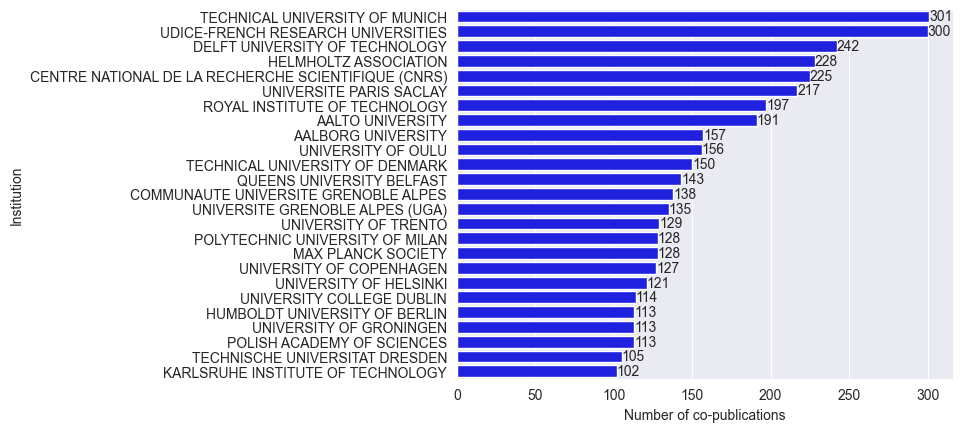

In [52]:
data = inst_collab[0:25]
g = sns.barplot(data, x="count", y=aff, color="blue")
# g.set_xlim(0,6000)
g.set_ylabel("Institution")
g.set_xlabel("Number of co-publications")
for i in g.containers:
    g.bar_label(i,)